# Практическая работа №3: Кластерный анализ.
Выполнила студентка гр. 0373 Гладкова Елизавета. Вариант №4

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
Кластерный анализ - задача разбиения заданной выборки объектов (ситуаций) на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались. / классификации объектов или событий в относительно гомогенные (однородные) группы, которые называются кластерами.

Задача кластеризации относится к статистической обработке.

Основные задачи:
1. Разработка технологии/классификации.

2. Исследование полезных концептуальных схем группирования объектов.

3. Порождение гипотез на основании исследования данных.

4. Проверка исследования или гипотез для определения, действительно ли группы, выделенные каким-либо методом, есть в имеющихся данных.

Основные цели:
1. Получение информации о данных, их понимание при помощи выявления кластерной структуры.

2. Сжатие данных. При большом объёме выборки её можно сократить, оставив от кластера по одному наиболее типичному представителю.

3. Выделение типичных объектов, которые невозможно определить ни к какому из имеющихся кластеров.

Этапы кластеризации:
1. Отбор выборки объектов для кластеризации.

2. Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости - нормализация значений переменных.

3. Вычисление значений меры сходства между объектами.

4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).

5. Предоставление результатов анализа.

Метрика - неотрицательная вещественная функция $d(x,y)$ (функция расстояния), если:
1. $d(x,y)\geq{0}$

2. $d(x,y)=d(y,x)$

3. $d(x,y)\leq{d(x,z)+d(z,y)}$

$\bullet$ Евклидово расстояние: $d(x,y)=\sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$

$\bullet$ Манхэттенское расстояние: $d(x,y)=\sum_{i=1}^{n}|x_{i}-y_{i}|$

Алгоритм k-means - суть алгоритма заключается в минимизации квадратичного отношения точек кластеров от центров этих кластеров. В качестве критерия используется минимальное расстояние внутри кластера относительно среднего. Основная идея заключается в том, что на каждой интерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центор оказался ближе по выбранной метрике (Евклидово расстояние). Алгоритм завершается, когда все кластеры стабилизируются.

Алгоритм k-medoids - алгоритм, в отличие от k-means, использует для представления центра кластера не центр масс, а представительный объект - один из объектов кластера. Каждый из оставшихся объектов объединятся в кластер с ближайшим медоидом (представительным объектом). Далее необходимо выполнять алгоритм пока стоимость выбора нового медоида снижается. Необходимо определить точку, принадлежащую кластеру, расстояние которой до всех других точек кластера минимально.

«Грубая» оценка количества кластеров - оценка количества кластеров, после которой увеличение количества кластеров нецелесообразно: $k=[\sqrt{\frac{n}{2}}]$

Метод локтя: многократное циклическое испоолнение алгоритма с увеличением количества выбираемых кластеров и откладыванием на графике разброса кластеризации, вычисленного как функция от количества кластеров. Разброс является мерой отношения внутриклассного расстояния:

$W_{C_{j}}=\sum_{x_{i}\in{C_{j}}}{(x_{i}-x_{C_{j}})^2}$, где $W_{C_{j}}$ - разброс внутри кластера, $C_{j}$ - множество элекментов кластеров, $x_{C_{j}}$ - центр кластера.

С увеличением количества кластеров разброс стремится к нулю:

$W=\sum_{j=1}^{k}W_{C_{j}}$

Метод поиска сгущений (FOREL) - на каждой итерации случайным образом выбирается объект из выборки, вокруг него раздувается гиперсфера (окружность) радиуса R, внутри этой сферы выбирается центр масс (центр новой сферы). После того как центроид стабилизируется, все помеченные объекты вместе с центром помечаются как кластеризованные и выкидываются из выборки. Этот процесс повторяется до тех пор, пока вся выборка не будет кластеризована. Радиус выбирается из промежутка: $[R_{min};R_{max}]$, где $R_{min}$ и $R_{max}$ получают из матрицы $D=\left\{ d_{ij}\right\}$: $R_{min}=min\left\{d_{ij}\gt{0}\right\}, R_{max}=max\left\{ d_{ij}\right\}$

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать

## Выполнение работы

### Пункт 1

Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

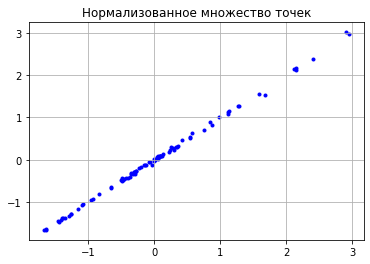

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
columns = ['Column1','Column2']
dataset = pd.read_csv('../input/vyborka/.csv', header = None, names = columns)
m=dataset['Column1'].values
n=dataset['Column2'].values
for i in range(0,len(n)):
    h = len(n[i])
    n[i] = n[i][:h-1]
    n[i] = np.float64(n[i])
vyb_cped=0
vyb_cped2=0
for i in range(len(m)):
    vyb_cped=vyb_cped+m[i]/len(m)
    vyb_cped2=vyb_cped2+n[i]/len(m)
    
dispersia=0
dispersia2=0
for i in range(len(m)):
    dispersia=dispersia+(m[i]-vyb_cped)**2/len(m)
    dispersia2=dispersia2+(n[i]-vyb_cped2)**2/len(m)
    
sko=np.sqrt(dispersia)
sko2=np.sqrt(dispersia2)

for i in range(len(m)):
    m[i]=(m[i]-vyb_cped)/sko
    n[i]=(n[i]-vyb_cped2)/sko2
    
plt.scatter(m,n,c='b',marker='.')
plt.title("Нормализованное множество точек")
plt.grid()
plt.show()

### Пункт 2

 Определить «грубую» верхнюю оценку количества кластеров.

In [ ]:
mark=int(np.sqrt(len(m)/2))
print(mark)

6


### Пункт 3

Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

центроиды [[-0.0, -0.0]]
кол-во элементов в кластерах [89]


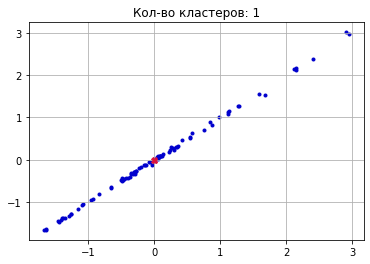

центроиды [[-0.42013, -0.41886], [1.44946, 1.44508]]
кол-во элементов в кластерах [69, 20]


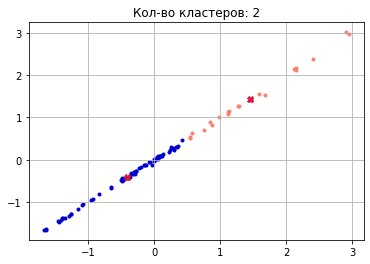

центроиды [[-1.29608, -1.29662], [1.66007, 1.65817], [-0.05876, -0.05803]]
кол-во элементов в кластерах [18, 16, 55]


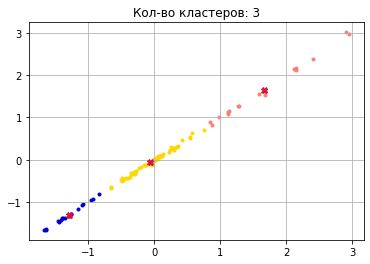

центроиды [[-1.32296, -1.3256], [0.29099, 0.28623], [1.83634, 1.83057], [-0.34869, -0.33962]]
кол-во элементов в кластерах [17, 30, 13, 29]


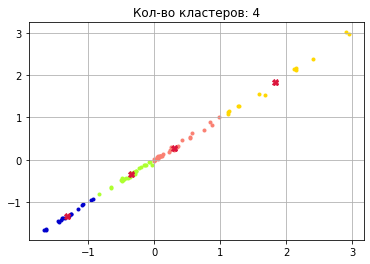

центроиды [[-1.41549, -1.42336], [-0.29512, -0.28755], [0.30132, 0.29707], [-0.89159, -0.87785], [1.83634, 1.83057]]
кол-во элементов в кластерах [13, 27, 29, 7, 13]


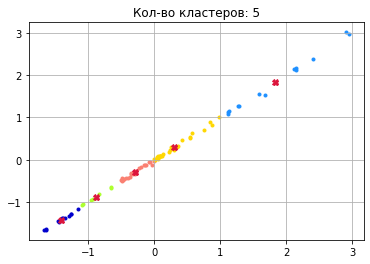

центроиды [[-1.43656, -1.44424], [-0.36328, -0.35214], [0.17549, 0.1696], [1.14823, 1.12882], [-1.01512, -1.00139], [2.44863, 2.46783]]
кол-во элементов в кластерах [12, 25, 29, 11, 6, 6]


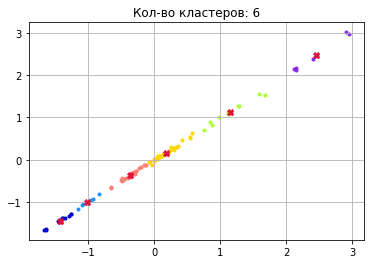

In [ ]:
from prettytable import PrettyTable
m = m.tolist()
n = n.tolist()    

def kmeans(x,y,cntr,N):   # алгоритм k-means
    chtt=np.inf
    while chtt>0.001:    
        spskx=[]
        spsky=[]
        cym_x=[0]*N
        cym_y=[0]*N
        chtt_c=[0]*N
        gip=[0]*N
        for i in range(N):
            spskx=spskx+[[]]
            spsky=spsky+[[]]
        for i in range(len(x)):
            for j in range(N):
                gip[j]=((x[i]-cntr[j][0])**2+(y[i]-cntr[j][1])**2)
            pr=50
            for k in range(N):
                if gip[k]<pr:
                    pr=gip[k]
                    l=k
            spskx[l]=spskx[l]+[x[i]]
            spsky[l]=spsky[l]+[y[i]]
        for i in range(N):
            cym_x[i]=sum(spskx[i])/len(spskx[i])
            cym_y[i]=sum(spsky[i])/len(spsky[i])
        for i in range(N):
            chtt_c[i]=(cym_x[i]-cntr[i][0])**2+(cym_y[i]-cntr[i][1])**2
        for i in range(N):
            cntr[i][0]=round(cym_x[i],5)
            cntr[i][1]=round(cym_y[i],5)
        cen=[]
        chtt=sum(chtt_c)
        for i in range(N):
            cen=cen+[len(spskx[i])]
    return cntr,spskx,spsky,cen

def pstrn(cntr,spskx,spsky,N):    # отображение на графиках
    fig, graf=plt.subplots()
    color = ['mediumblue','salmon','gold','greenyellow','dodgerblue','blueviolet']
    for i in range(N):
        graf.scatter(spskx[i],spsky[i],c=color[i],marker='.')
        graf.plot(cntr[i][0],cntr[i][1],'crimson',marker="X")
    graf.set_title('Кол-во кластеров: %i'%(i+1))
    plt.grid()
    plt.show()
    
strtcnt = [[[m[12], n[12]]],[[m[12], n[12]],[m[77], n[77]]],[[m[12], n[12]],[m[74], n[74]],[m[77], n[77]]],   #начальные центроиды
[[m[12], n[12]],[m[36], n[36]],[m[54], n[54]],[m[77], n[77]]],[[m[12], n[12]],[m[36], n[36]],[m[54], n[54]],[m[77], n[77]],[m[86], n[86]]],
[[m[12], n[12]],[m[24], n[24]],[m[36], n[36]],[m[54], n[54]],[m[77], n[77]],[m[86], n[86]]],
[[m[12], n[12]],[m[24], n[24]],[m[36], n[36]],[m[48], n[48]],[m[60], n[60]],[m[77], n[77]],[m[86], n[86]]]]
table = PrettyTable(["Значение k","Центроиды кластера","Объём кластера"])

koorC=[]
koorx=[]
koory=[]
for i in range(mark):
    cntr,spskx,spsky,obyom=kmeans(m,n,strtcnt[i],i+1)
    koorC.append(cntr)
    koorx.append(spskx)
    koory.append(spsky)
    print("центроиды", cntr)
    print("кол-во элементов в кластерах",obyom)
    pstrn(cntr,spskx,spsky,i+1)
    table.add_row([i+1,cntr[0],obyom[0]])
    for j in range(1,i+1):
        table.add_row(["",cntr[j],obyom[j]])

### Пункт 4

Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

центроиды: [[0.00085, 0.00764]]
кол-во элементов в кластерах [89]


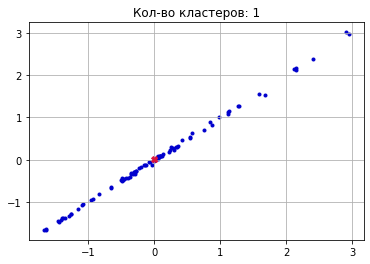

центроиды: [[-0.43599, -0.42418], [1.28197, 1.26405]]
кол-во элементов в кластерах [68, 21]


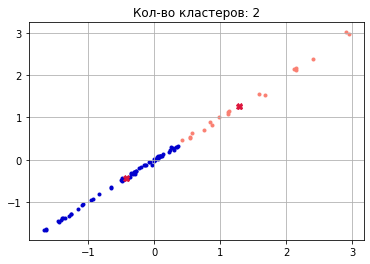

центроиды: [[-1.26977, -1.28348], [1.67366, 1.53855], [-0.07161, -0.06396]]
кол-во элементов в кластерах [18, 16, 55]


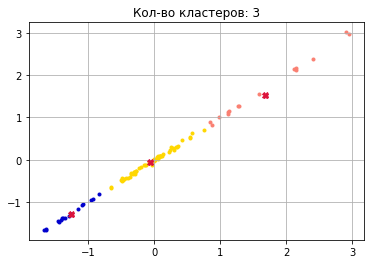

центроиды: [[-1.30127, -1.33013], [0.27703, 0.26804], [1.67366, 1.53855], [-0.35828, -0.34389]]
кол-во элементов в кластерах [17, 29, 14, 29]


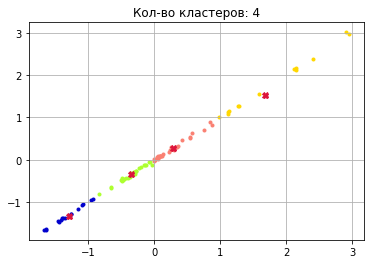

центроиды: [[-1.44094, -1.47118], [-0.30158, -0.29832], [0.27703, 0.26804], [-0.93584, -0.92652], [1.67366, 1.53855]]
кол-во элементов в кластерах [12, 26, 29, 8, 14]


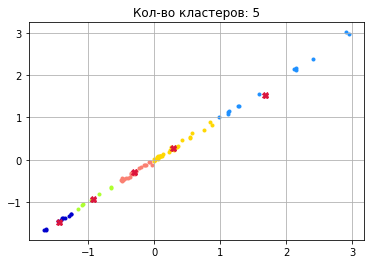

центроиды: [[-1.44094, -1.47118], [-0.4801, -0.47626], [-0.20602, -0.17138], [0.32533, 0.29191], [-0.96629, -0.9645], [1.67366, 1.53855]]
кол-во элементов в кластерах [12, 12, 19, 26, 6, 14]


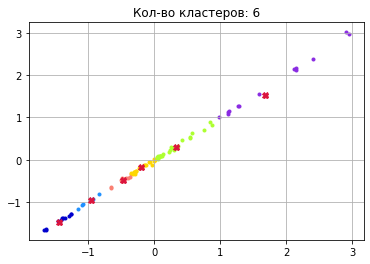

In [ ]:
def kmedoids(x,y,cntr,N):  # алгоритм k-medoids
    chtt=np.inf
    while chtt>0.01:
        spskx=[]
        spsky=[]  
        for i in range(N):
            spskx=spskx+[[]]
            spsky=spsky+[[]]       
        for i in range(len(x)):
            gip=[0]*N
            for j in range(N):
                gip[j]=((x[i]-cntr[j][0])**2+(y[i]-cntr[j][1])**2) 
            pr=100
            l=0
            for k in range(N):
                if gip[k]<pr:
                    pr=gip[k]
                    l=k
            spskx[l]=spskx[l]+[x[i]]
            spsky[l]=spsky[l]+[y[i]]
        index=[0]*N
        for i in range(N):
            summa=[0]*(len(spskx[i]))
            for j in range(len(spskx[i])):
                for k in range(len(spskx[i])):
                    if (k!=j):
                        summa[j]=summa[j]+((spskx[i][j]-spskx[i][k])**2+(spsky[i][j]-spsky[i][k])**2)       
            index[i]=summa.index(min(summa))
        chtt_c=[0]*N
        for i in range(N):
            chtt_c[i]=(spskx[i][index[i]]-cntr[i][0])**2+(spsky[i][index[i]]-cntr[i][1])**2
        chtt=sum(chtt_c)
        for i in range(N):
            cntr[i][0]=round(spskx[i][index[i]],5)
            cntr[i][1]=round(spsky[i][index[i]],5)
        cen=[]
        for i in range(N):
            cen=cen+[len(spskx[i])]        
    return cntr,spskx,spsky,cen
    
strtcnt = [[[m[12], n[12]]],[[m[12], n[12]],[m[77], n[77]]],[[m[12], n[12]],[m[74], n[74]],[m[77], n[77]]],   
[[m[12], n[12]],[m[36], n[36]],[m[54], n[54]],[m[77], n[77]]],[[m[12], n[12]],[m[36], n[36]],[m[54], n[54]],[m[77], n[77]],[m[86], n[86]]],
[[m[12], n[12]],[m[24], n[24]],[m[36], n[36]],[m[54], n[54]],[m[77], n[77]],[m[86], n[86]]],
[[m[12], n[12]],[m[24], n[24]],[m[36], n[36]],[m[48], n[48]],[m[60], n[60]],[m[77], n[77]],[m[86], n[86]]]]
table1 = PrettyTable(["Значение k","Центроиды кластера","Объём кластера"]) 

koorC2=[]
koorx2=[]
koory2=[]
for i in range(mark):
    cntr,spskx,spsky,obyom=kmedoids(m,n,strtcnt[i],i+1)
    koorC2.append(cntr)
    koorx2.append(spskx)
    koory2.append(spsky)
    print("центроиды:", cntr)
    print("кол-во элементов в кластерах",obyom)
    pstrn(cntr,spskx,spsky,i+1)
    table1.add_row([i+1,cntr[0],obyom[0]])
    for j in range(1,i+1):
        table1.add_row(["",cntr[j],obyom[j]])

### Пункт 5

Для каждого метода заполнить таблицу.

In [ ]:
print("Алгоритм k-means:")
print(table)
print("Алгоритм k-medoids:")
print(table1)

Алгоритм k-means:
+------------+----------------------+----------------+
| Значение k |  Центроиды кластера  | Объём кластера |
+------------+----------------------+----------------+
|     1      |     [-0.0, -0.0]     |       89       |
|     2      | [-0.42013, -0.41886] |       69       |
|            |  [1.44946, 1.44508]  |       20       |
|     3      | [-1.29608, -1.29662] |       18       |
|            |  [1.66007, 1.65817]  |       16       |
|            | [-0.05876, -0.05803] |       55       |
|     4      | [-1.32296, -1.3256]  |       17       |
|            |  [0.29099, 0.28623]  |       30       |
|            |  [1.83634, 1.83057]  |       13       |
|            | [-0.34869, -0.33962] |       29       |
|     5      | [-1.41549, -1.42336] |       13       |
|            | [-0.29512, -0.28755] |       27       |
|            |  [0.30132, 0.29707]  |       29       |
|            | [-0.89159, -0.87785] |       7        |
|            |  [1.83634, 1.83057]  |       13 

### Пункт 6

С помощью метода локтя выявить для каждого метода оптимальное количество кластеров.

Для метода k-means:


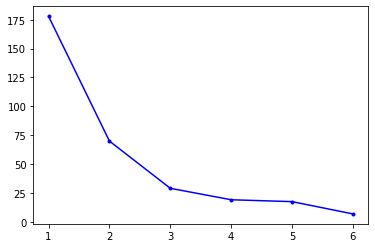

Для метода k-medoids:


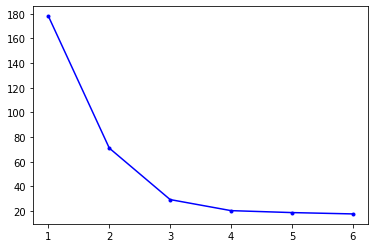

In [ ]:
W=[0]*6
K=[0]*6
for i in range(1,mark+1):
    K[i-1]=i
for i in range(mark):
    cym_w=0
    for j in range(len(koorC[i])):
        w1=0
        for k in range(len(koorx[i][j])):
            w1=w1+((koorx[i][j][k]-koorC[i][j][0])**2+(koory[i][j][k]-koorC[i][j][1])**2)
        cym_w=cym_w+w1
    W[i]=cym_w
print("Для метода k-means:")
plt.plot(K,W,c='b',marker='.')
plt.show()

W2=[0]*6
K2=[0]*6
for i in range(1,mark+1):
    K2[i-1]=i
for i in range(mark):
    cym_w2=0
    for j in range(len(koorC2[i])):
        w2=0
        for k in range(len(koorx2[i][j])):
            w2=w2+((koorx2[i][j][k] - koorC2[i][j][0])**2 + (koory2[i][j][k] - koorC2[i][j][1])**2)
        cym_w2=cym_w2+w2
    W2[i]=cym_w2
print("Для метода k-medoids:")
plt.plot(K2,W2,c='b',marker='.')
plt.show()

Вывод: в данном методе оптимальное количество кластеров на графике выглядит как перегиб функции, напоминающей локоть. Следовательно, исходя из полученных графиков, для обоих алгоритмов оптимальное количество кластеров равно 3.

### Пункт 7

Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы.

In [ ]:
def forel(x,y,r):  # алгоритм поиска сгущений
    sen=[]
    klastery=[]
    u=[]
    obyom=[]
    for i in range(len(x)):
        u=u+[[x[i],y[i]]]
    while (len(u)!=0):
        strtx = u[0]
        while True:
            k=[]
            for i in range(len(u)):
                if ((strtx[0]-u[i][0])**2+(strtx[1]-u[i][1])**2)**0.5<=r:
                    k=k+[u[i]]
            strtx2=[0,0]
            for i in range(len(k)):
                strtx2[0]=strtx2[0]+k[i][0]/len(k)
                strtx2[1]=strtx2[1]+k[i][1]/len(k)
            if strtx == strtx2:
                break
            strtx = strtx2
        u=[i for i in u if i not in k]
        sen=sen+[strtx]
        klastery=klastery+[k]
        obyom=obyom+[len(k)]  
    return sen,klastery,obyom

mtrc=np.zeros((len(m),len(m)))  # вычисление Rmin Rmax
rmin=100
rmax=-100
for i in range(len(m)):
    for j in range(len(m)):
        if i>j:
            mtrc[j][i]=((m[i]-m[j])**2+(n[i]-n[j])**2)**0.5
mtrc=mtrc.tolist()
for i in range(len(m)):
    for j in range(len(m)):
        if rmax<mtrc[i][j]:
            rmax=mtrc[i][j]
        if (rmin>mtrc[i][j])&(mtrc[i][j]>0):
            rmin=mtrc[i][j]
print("Rmin=",round(rmin,5))
print("Rmax=",round(rmax,5))

Rmin= 0.00387
Rmax= 6.54658


радиус R = 6.54658
центроиды: [[-0. -0.]]
кол-во элементов в кластерах [89]


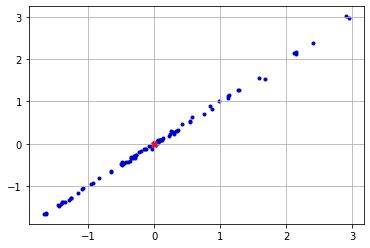

радиус R = 2.04658
центроиды: [[-0.16676 -0.16593]
 [-1.65131 -1.65274]
 [ 2.24517  2.23755]]
кол-во элементов в кластерах [78, 3, 8]


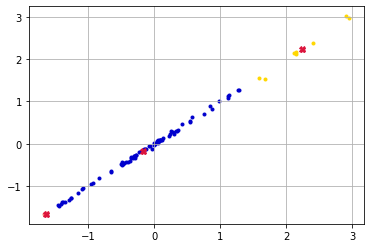

радиус R = 0.74658
центроиды: [[-0.08871 -0.08679]
 [-1.29608 -1.29662]
 [-0.65651 -0.65474]
 [ 0.91899  0.91677]
 [ 2.20842  2.20554]
 [ 2.92905  2.99242]
 [ 1.6348   1.54669]]
кол-во элементов в кластерах [49, 18, 2, 12, 4, 2, 2]


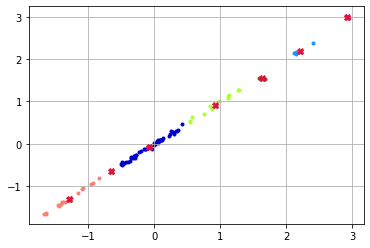

радиус R = 0.44658
центроиды: [[-0.0941  -0.0929 ]
 [-0.5053  -0.49448]
 [-1.27696 -1.28081]
 [-0.88753 -0.86522]
 [-1.65131 -1.65274]
 [ 0.37869  0.37506]
 [ 1.0401   1.03596]
 [ 2.20842  2.20554]
 [ 2.92905  2.99242]
 [ 1.6348   1.54669]]
кол-во элементов в кластерах [33, 10, 13, 2, 3, 11, 9, 4, 2, 2]


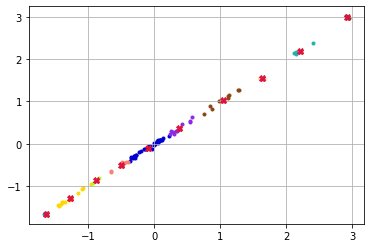

радиус R = 0.31658
центроиды: [[ 2.77000e-03  2.74000e-03]
 [-3.83840e-01 -3.75780e-01]
 [-8.10880e-01 -8.00880e-01]
 [-1.34475e+00 -1.35455e+00]
 [-1.65131e+00 -1.65274e+00]
 [-1.09335e+00 -1.07028e+00]
 [ 3.58930e-01  3.50060e-01]
 [ 7.62960e-01  7.62520e-01]
 [ 1.14756e+00  1.14976e+00]
 [ 2.40768e+00  2.38592e+00]
 [ 2.92905e+00  2.99242e+00]
 [ 2.14200e+00  2.14541e+00]
 [ 1.63480e+00  1.54669e+00]]
кол-во элементов в кластерах [23, 18, 5, 10, 3, 2, 10, 4, 6, 1, 2, 3, 2]


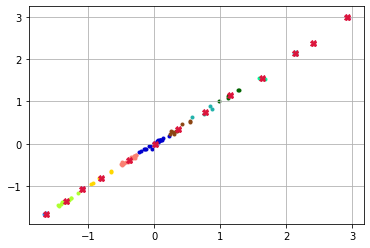

+------------+----------------------+----------------+
| Значение R |  Центроиды кластера  | Объем кластера |
+------------+----------------------+----------------+
|  6.54658   |     [-0.0, -0.0]     |       89       |
|  2.04658   | [-0.16676, -0.16593] |       78       |
|            | [-1.65131, -1.65274] |       3        |
|            |  [2.24517, 2.23755]  |       8        |
|  0.74658   | [-0.08871, -0.08679] |       49       |
|            | [-1.29608, -1.29662] |       18       |
|            | [-0.65651, -0.65474] |       2        |
|            |  [0.91899, 0.91677]  |       12       |
|            |  [2.20842, 2.20554]  |       4        |
|            |  [2.92905, 2.99242]  |       2        |
|            |  [1.6348, 1.54669]   |       2        |
|  0.44658   |  [-0.0941, -0.0929]  |       33       |
|            | [-0.5053, -0.49448]  |       10       |
|            | [-1.27696, -1.28081] |       13       |
|            | [-0.88753, -0.86522] |       2        |
|         

In [ ]:
def pstrngrfk(sen,klstr):  # отображение на графиках
    fig, graf=plt.subplots()
    color= ['mediumblue','salmon','gold','greenyellow','dodgerblue','blueviolet','saddlebrown','lightseagreen','darkgreen','moccasin','plum','cyan','mediumspringgreen']
    for j in range(len(klstr)):
        for k in range(len(klstr[j])):
            graf.scatter(klstr[j][k][0],klstr[j][k][1],c=color[j],marker='.')
        plt.plot(sen[j][0],sen[j][1],'crimson',marker="X")   
    plt.grid()
    plt.show()
    
r=[rmax,rmax-4.5,rmax-5.8,rmax-6.1,rmax-6.23]
table3 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(r)):
    sen,klstr,obyom=forel(m,n,r[i]) 
    print("радиус R =", round(r[i],5))
    for k in range(len(klstr)):
        for j in range(len(sen[k])):
            sen[k][j]=round(sen[k][j],5)   
    print("центроиды:", np.array(sen))
    print("кол-во элементов в кластерах",obyom)
    table3.add_row([round(r[i],5),sen[0],obyom[0]])
    for j in range(1,len(klstr)):
        table3.add_row(["",sen[j],obyom[j]])
    pstrngrfk(sen,klstr)
print(table3)

### Пункт 8

Проверить чувствительность метода поиска сгущений к погрешностям.

центроиды:
 [[-0. -0.]]
объём кластеров: [89]


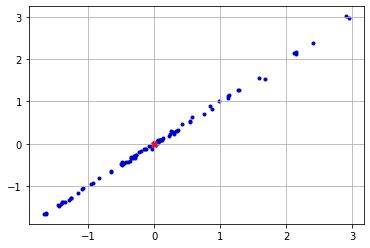

центроиды:
 [[-0.16676 -0.16593]
 [-1.65131 -1.65274]
 [ 2.24517  2.23755]]
объём кластеров: [78, 3, 8]


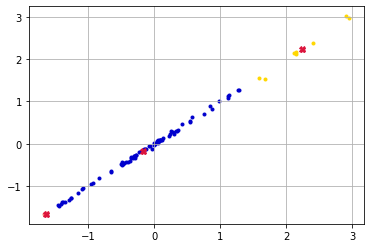

центроиды:
 [[-0.08871 -0.08679]
 [-1.29608 -1.29662]
 [-0.65651 -0.65474]
 [ 0.91899  0.91677]
 [ 2.20842  2.20554]
 [ 2.92905  2.99242]
 [ 1.6348   1.54669]]
объём кластеров: [49, 18, 2, 12, 4, 2, 2]


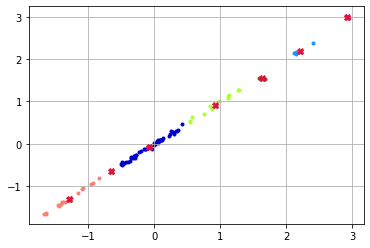

центроиды:
 [[-0.0941  -0.0929 ]
 [-0.5053  -0.49448]
 [-1.27696 -1.28081]
 [-0.88753 -0.86522]
 [-1.65131 -1.65274]
 [ 0.37869  0.37506]
 [ 1.0401   1.03596]
 [ 2.20842  2.20554]
 [ 2.92905  2.99242]
 [ 1.6348   1.54669]]
объём кластеров: [33, 10, 13, 2, 3, 11, 9, 4, 2, 2]


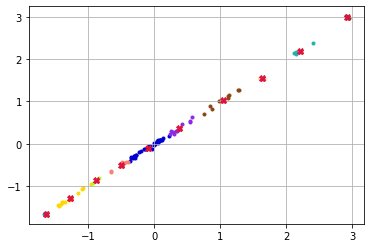

центроиды:
 [[ 2.77000e-03  2.74000e-03]
 [-3.83840e-01 -3.75780e-01]
 [-8.10880e-01 -8.00880e-01]
 [-1.34475e+00 -1.35455e+00]
 [-1.65131e+00 -1.65274e+00]
 [-1.09335e+00 -1.07028e+00]
 [ 3.58930e-01  3.50060e-01]
 [ 7.62960e-01  7.62520e-01]
 [ 1.14756e+00  1.14976e+00]
 [ 2.40768e+00  2.38592e+00]
 [ 2.92905e+00  2.99242e+00]
 [ 2.14200e+00  2.14541e+00]
 [ 1.63480e+00  1.54669e+00]]
объём кластеров: [23, 18, 5, 10, 3, 2, 10, 4, 6, 1, 2, 3, 2]


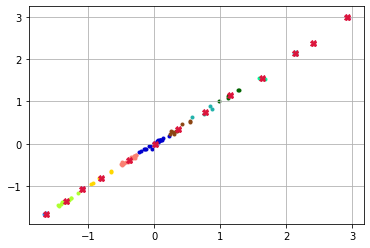

+------------+----------------------+----------------+
| Значение R |  Центроиды кластера  | Объём кластера |
+------------+----------------------+----------------+
|  6.54758   |     [-0.0, -0.0]     |       89       |
|  2.04758   | [-0.16676, -0.16593] |       78       |
|            | [-1.65131, -1.65274] |       3        |
|            |  [2.24517, 2.23755]  |       8        |
|  0.74758   | [-0.08871, -0.08679] |       49       |
|            | [-1.29608, -1.29662] |       18       |
|            | [-0.65651, -0.65474] |       2        |
|            |  [0.91899, 0.91677]  |       12       |
|            |  [2.20842, 2.20554]  |       4        |
|            |  [2.92905, 2.99242]  |       2        |
|            |  [1.6348, 1.54669]   |       2        |
|  0.44758   |  [-0.0941, -0.0929]  |       33       |
|            | [-0.5053, -0.49448]  |       10       |
|            | [-1.27696, -1.28081] |       13       |
|            | [-0.88753, -0.86522] |       2        |
|         

In [ ]:
table4 = PrettyTable(["Значение R","Центроиды кластера","Объём кластера"])
for i in range(len(r)):
    r[i]=r[i]+0.001  # для проверки чувствительности метода, к каждому радиусу из предыдущего пункта добавляется 0.001 
    sen,klstr,obyom=forel(m,n,r[i]) 
    for k in range(len(klstr)):
        for j in range(len(sen[k])):
            sen[k][j]=round(sen[k][j],5)   
    print("центроиды:\n", np.array(sen))
    print("объём кластеров:",obyom)
    table4.add_row([round(r[i],5),sen[0],obyom[0]])
    for j in range(1,len(klstr)):
        table4.add_row(["",sen[j],obyom[j]])
    pstrngrfk(sen,klstr)
print(table4)

Вывод: в результате сравнения таблиц 7 и 8 пункта отличий не было выявлено, следовательно, что метод поиска сгущений нечувствителен к погрешностям.

### Пункт 9

Сравнить методы.

Основываясь на результатах метода локтя, можно утверждать, что для представленной выборки оптимальным количеством кластеров является 3 (как для алгоритма k-means, так и для алгоритма k-medoids).

При использовании метода поиска сгущений объёмы полученных кластеров заметно отличаются друг от друга, что, в сравнении с методами k-means и k-medoids, демонстрирует целесообразность использования методов k-means и k-medoids для представленной выборки.

## Выводы
В процессе выполнения данной практической работы были достигнуты поставленные задачи. В первую очередь, освоены основные понятия и некоторые методы кластерного анализа, в частности, метод k-means, k-medoids и метода поиска сгущений. Определена «грубая» верхняя оценка количества кластеров k=6 для представленной выборки. Реализован метод локтя, с помощью которому выявлено, что оптимальным количеством кластеров для k-means и k-medoids является 3.